https://github.com/oliverphilcox/montepython_equality/blob/master/montepython/likelihoods/ngc_z1_marg/__init__.py

In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as Spline

In [7]:
from classy import Class
cosmo=Class()
z_pk = 0.61

cosmo.set({'output':'mPk',\
          'non linear':'none',
           'P_k_max_1/Mpc':50.0,
          'z_pk':z_pk})
cosmo.compute()

In [8]:
k = np.logspace(-4,1, 1000) # 1/Mpc
#rvec = np.logspace(np.log10(r.min()),np.log10(r.max()),1000)
rvec = np.logspace(np.log10(0.01),np.log10(1000),1000)
pk_=np.array([cosmo.pk_lin(ki,z_pk) for ki in k])
ipk_lin = Spline(k,pk_)

In [9]:
k_pk = np.array([k,pk_]).T
np.savetxt('pk_example.txt',k_pk,header='k [1/Mpc]    P(k) [(Mpc)^3]')

# try numerical integral P2xi

$\xi(r)=\int_0^\infty dk\frac{k^2}{2\pi^2}j_0(kr)P(k)$

$j_0(x)=\sin(x)/x$

17.3 ms ± 147 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


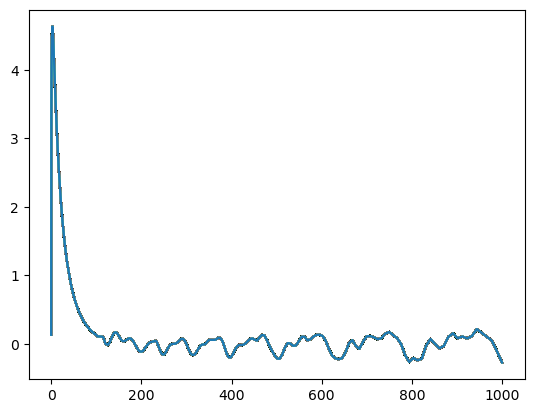

In [13]:
%timeit trapz_P2xi(k1,rvec,ipk_lin(k1)) # 2**11

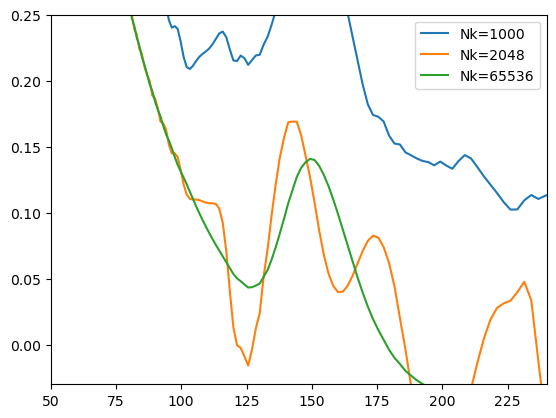

In [12]:
from numpy import trapz
def trapz_P2xi(karr,rarr,pkarr):
    xi_trapz=np.zeros(rarr.size)
    for i,ri in enumerate(rarr):
        xi_trapz[i]=trapz(pkarr*np.sin(karr*ri)/(karr*ri)*karr**2,karr)/2/np.pi**2
    plt.plot(rvec,rvec**1*xi_trapz,label=f'Nk={karr.shape[0]}')
trapz_P2xi(k,rvec,ipk_lin(k))

# let's try denser grid
k1 = np.logspace(-4,1, 2**11)
trapz_P2xi(k1,rvec,ipk_lin(k1))



k2 = np.logspace(-4,1, 2**16)
trapz_P2xi(k2,rvec,ipk_lin(k2))

plt.xlim([50.,240.])
plt.ylim([-0.03,0.25])
plt.legend()

# hankl

## P2xi

/Users/zhiyulu/Install/anaconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:722: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


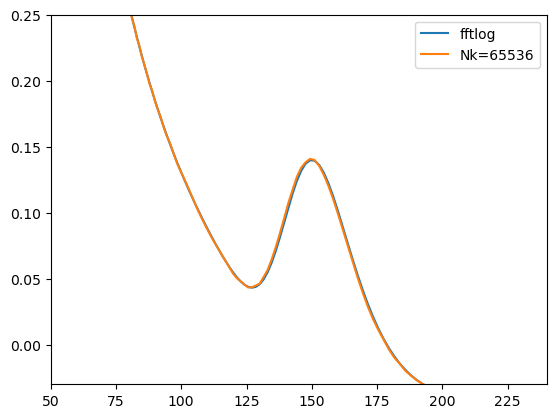

In [5]:
import hankl
from scipy import interpolate
s,xi=hankl.P2xi(k,ipk_lin(k),l=0)
xi0inter = interpolate.InterpolatedUnivariateSpline(s,xi)

xi_lin = []
for r in rvec:
    xi_lin.append(xi0inter(r))

plt.plot(rvec,xi_lin*rvec,label='fftlog')


trapz_P2xi(k2,rvec,ipk_lin(k2))






plt.xlim([50.,240.])
plt.ylim([-0.03,0.25])

plt.legend()

## xi2p

/Users/zhiyulu/Install/anaconda3/lib/python3.11/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


[]

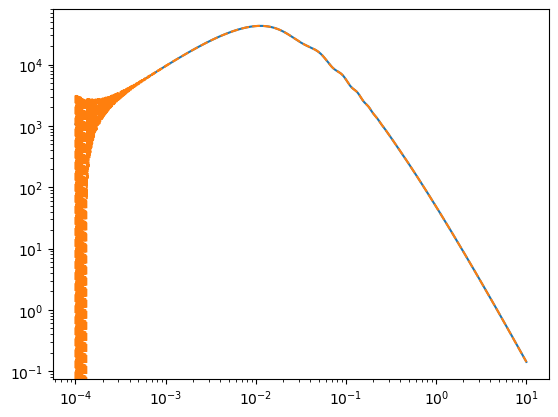

In [6]:
karr,pkr=hankl.xi2P(s,xi,l=0)
p0inter = interpolate.InterpolatedUnivariateSpline(karr,pkr)

pk_rec = []
for ki in k:
    pk_rec.append(p0inter(ki))
plt.plot(k,ipk_lin(k))
plt.plot(k,pk_rec,'--')
plt.loglog()

# complex power law approximation

In [7]:
from pk_utils import ComplexPowerLawApprox_FFTlog      

Text(0.5, 0, 's[Mpc]')

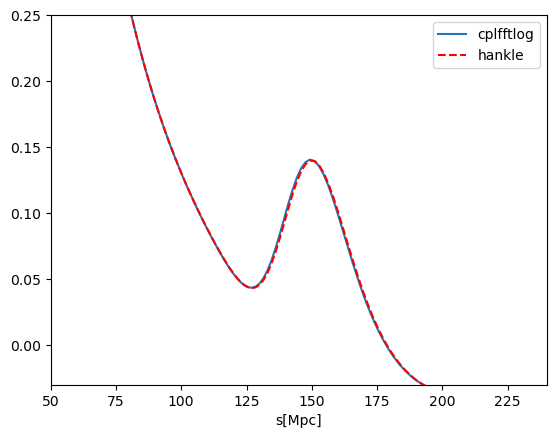

In [8]:
cplfftlog=ComplexPowerLawApprox_FFTlog()
r=cplfftlog.r_arr
k=cplfftlog.k_arr
xi=cplfftlog.P2xi(ipk_lin(k),ell=0)
ixi1=Spline(r,xi)

xi2=cplfftlog.P2xi(ipk_lin(k),ell=2)
ixi2=Spline(r,xi2)


plt.plot(rvec,rvec**1*ixi1(rvec),label='cplfftlog')
#plt.plot(rvec,rvec**1*ixi2(rvec),label='xiL2:pk')

plt.plot(rvec,xi_lin*rvec,'--r',label='hankle')

# plt.xlim([50.,140.])
# plt.ylim([-0.03,0.15])
plt.xlim([50.,240.])
plt.ylim([-0.03,0.25])
plt.legend()
plt.xlabel('s[Mpc]')

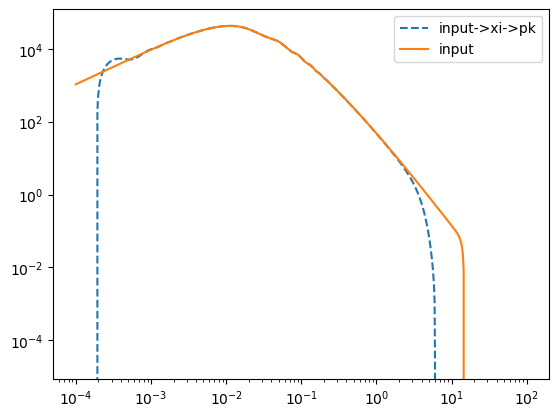

In [9]:
pkr=cplfftlog.xi2P(xi,ell=0)
plt.plot(k,pkr,'--',label='input->xi->pk')
plt.plot(k,ipk_lin(k),label='input')
plt.loglog()
plt.legend()

(80.0, 220.0)

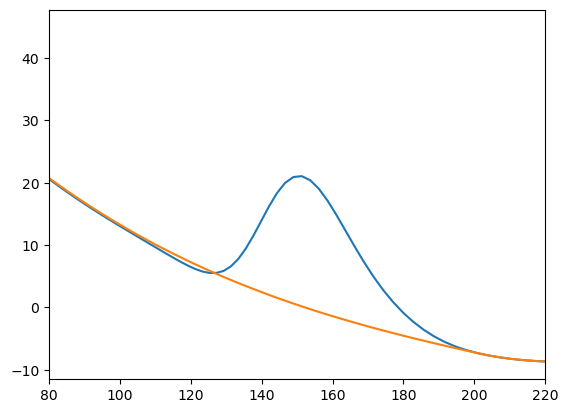

In [10]:
nowiggle_xi=cplfftlog.wiggle_split(xi)

plt.plot(r,r**2*xi)
plt.plot(r,r**2*nowiggle_xi)
plt.xlim(80,220)

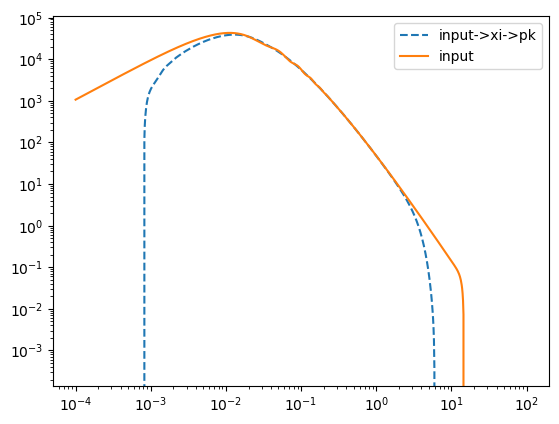

In [11]:
# get nowiggle pk
from scipy.interpolate import InterpolatedUnivariateSpline,CubicSpline

nowiggle_pkh=cplfftlog.xi2P(nowiggle_xi,ell=0)
spline_nowiggle_pkh=InterpolatedUnivariateSpline(k,nowiggle_pkh)
nowiggle_pkh=spline_nowiggle_pkh(k)


plt.plot(k,nowiggle_pkh,'--',label='input->xi->pk')
plt.plot(k,ipk_lin(k),label='input')
plt.loglog()
plt.legend()
